# 최소 제곱 선형회귀

In [26]:
import numpy as np

In [27]:
# x값과 y값
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

In [28]:
# x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)
print("x평균 : ", mx, "\ny평균 : ", my)

x평균 :  5.0 
y평균 :  90.5


In [29]:
# 기울기 공식의 분모 **2 는 제곱
divisor = sum([(mx - i) ** 2 for i in x ])
print("분모 : ", divisor)

분모 :  20.0


In [30]:
# 기울기 공식의 분자
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)
print("분자 : ", dividend)

분자 :  46.0


In [33]:
# 기울기와 y 절편 구하기
a = dividend / divisor
b = my - (mx * a)
print("x평균 : ", mx, "\ny평균 : ", my)
print("분모 : ", divisor)
print("분자 : ", dividend)
print("기울기 : ", a)
print("y절편 : ", b)

x평균 :  5.0 
y평균 :  90.5
분모 :  20.0
분자 :  46.0
기울기 :  2.3
y절편 :  79.0


# 평균 제곱 오차
## 입력데이터의 수가 적을때는 최소 제곱 오차로 쉽게 구할수 있지만 
## 입력데이터의 수가 많아질수록 평균 제곱오차로 구하는게 좋다.
## 머신러닝의 선형회귀는 임의의 직선을 그어 이에 대한 평균제곱 오차를 구하고 이를 가장 작게 만들어주는 a, b 의값을 찾아내는 작업

In [59]:
# a:3, b = 76으로 설정
fake_a_b = [3, 76]
#fake_a_b = [2.3, 79]

In [60]:
# 공부 시간에 따른 성적 데이터
data = [ [2, 81], [4, 93], [6, 91], [8, 97] ]
# x 와 y로 분할하기
x = [i[0] for i in data]
y = [i[1] for i in data]

In [61]:
# 1차 방적식 y = ax + b 를 구현
def predict(x):
    return fake_a_b[0]*x + fake_a_b[1]

# 평균 제곱오차 구하는 함수 실제값, 예측값 을 대입
def mse(y, y_hat):
    return ((y - y_hat) ** 2).mean()

def mse_val(y, predict_result):
    return mse(np.array(y), np.array(predict_result))

In [62]:
# 예측값이 들어갈 빈 리스트
predict_result = []

# 모든 x 값을 한번씩 대입하여
for i in range(len(x)):
    # 그 결과에 해당하는 predict_result 리스트를 완성
    predict_result.append(predict(x[i]))
    print(f"공부시간={x[i]}, 실제점수={y[i]}, 예측점수={predict(x[i])}")


공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [63]:
# 최종 mse
print("mse 최종값 : ", str(mse_val(y, predict_result)))

mse 최종값 :  11.0


## a = 3, b = 76 오차는 약 11인것을 알수 있음
### 이제 경사 하강법을 이용해 오차를 줄여본다.

# 경사하강법

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
# 공부 시간 x와 성적 y리스트 만들기
data = [ [2, 81], [4, 93], [6, 91], [8, 97] ]

x = [i[0] for i in data]
y = [i[1] for i in data]

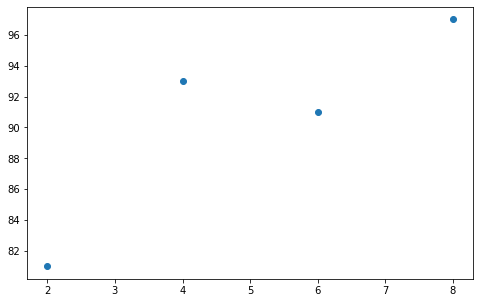

In [137]:
# 그래프로 나타내기
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.show()

In [138]:
# 리스트로 되어있는 x와 y값을 넘파이 배열로 바꾸기
# 인덱스를 주어 하나씩 불러와 계산하기 위함
x_data = np.array(x)
y_data = np.array(y)

In [139]:
# 기울기(a)와 절편(b) 값 초기화
a = 0
b = 0

In [140]:
# 학습률 정하기
lr = 0.03
# 반복수
epochs = 2100

In [141]:
# 경사하강법
# 기울기와 절편이 최소 제곱 선형회귀 값으로 수렴하는것을 알수 있다.
for i in range(epochs):      # 반복
    y_pred = a * x_data + b  # y를 구하는 식 세우기
    error = y_data - y_pred  # 오차구하기
    # 오차 함수를 a로 미분
    a_diff = -(2 / len(x_data)) * sum(x_data * error)
    # 오차 함수를 b로 미분
    b_diff = -(2 / len(x_data)) * sum(error)
    
    a = a - lr * a_diff
    b = b - lr * b_diff
    
    if i % 100 == 0:
        print(f"epoch={i}, 기울기 = {a}, 절편 = {b}")

epoch=0, 기울기 = 27.84, 절편 = 5.43
epoch=100, 기울기 = 7.073858435872394, 절편 = 50.51166161138297
epoch=200, 기울기 = 4.095999380762421, 절편 = 68.28224379060177
epoch=300, 기울기 = 2.9756829100119027, 절편 = 74.96781336233505
epoch=400, 기울기 = 2.5542024233262106, 절편 = 77.48302865233052
epoch=500, 기울기 = 2.3956349066513707, 절편 = 78.42929177728175
epoch=600, 기울기 = 2.3359793398132864, 절편 = 78.78529068727728
epoch=700, 기울기 = 2.313535987420573, 절편 = 78.91922301600925
epoch=800, 기울기 = 2.3050924490666174, 절편 = 78.96961044185792
epoch=900, 기울기 = 2.3019158585694823, 절편 = 78.98856697541248
epoch=1000, 기울기 = 2.3007207758016315, 절편 = 78.99569871827002
epoch=1100, 기울기 = 2.300271167070735, 절편 = 78.99838179089187
epoch=1200, 기울기 = 2.3001020172709508, 절편 = 78.9993912045567
epoch=1300, 기울기 = 2.300038380484562, 절편 = 78.99977096168232
epoch=1400, 기울기 = 2.3000144393354365, 절편 = 78.9999138322214
epoch=1500, 기울기 = 2.3000054323026444, 절편 = 78.99996758234106
epoch=1600, 기울기 = 2.300002043716771, 절편 = 78.99998780397235
epoch=170

# 다중 선형 회귀
## 추가적으로 과외 시간이라는 환경변수를 추가함으로 
## 두개의 독립변수로 아래의 식이 나온다.
## y = a₁x₁ + a₂x₂ + b

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [146]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [147]:
# 공부 시간 x와 성적 y리스트 만들기
data = [ [2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97] ]

x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

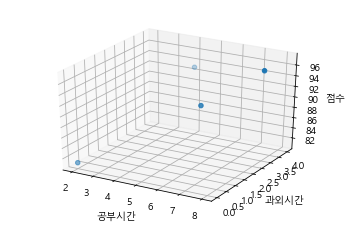

In [151]:
# 그래프로 확인
ax = plt.axes(projection='3d')
ax.set_xlabel("공부시간", labelpad=10)
ax.set_ylabel("과외시간", labelpad=10)
ax.set_zlabel("점수", labelpad=5)
ax.dist = 11
ax.scatter(x1, x2, y)
plt.show()

In [152]:
# 리스트로 되어있는 x와 y값을 넘파이 배열로 바꾸기
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

In [153]:
# 기울기(a)와 절편(b) 값 초기화
a1 = 0
a2 = 0
b = 0

In [154]:
# 학습률 정하기
lr = 0.02
# 반복수
epochs = 2100

In [155]:
# 경사하강법
# 기울기와 절편이 최소 제곱 선형회귀 값으로 수렴하는것을 알수 있다.
for i in range(epochs):      # 반복
    y_pred = a1 * x1_data + a2 * x2_data + b  # y를 구하는 식 세우기
    error = y_data - y_pred  # 오차구하기
    # 오차 함수를 a로 미분
    a1_diff = -(2 / len(x1_data)) * sum(x1_data * error)
    # 오차 함수를 a로 미분
    a2_diff = -(2 / len(x2_data)) * sum(x2_data * error)
    # 오차 함수를 b로 미분
    b_diff = -(2 / len(x1_data)) * sum(error)
    
    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    b = b - lr * b_diff
    
    if i % 100 == 0:
        print(f"epoch={i}, 기울기1 = {a1}, 기울기2 = {a2}, 절편 = {b}")

epoch=0, 기울기1 = 18.56, 기울기2 = 8.45, 절편 = 3.62
epoch=100, 기울기1 = 7.299356131570395, 기울기2 = 4.286665010585169, 절편 = 38.042652982512955
epoch=200, 기울기1 = 4.568311781727336, 기울기2 = 3.3451273722751873, 절편 = 56.790141149124004
epoch=300, 기울기1 = 3.123530871282515, 기울기2 = 2.8462827383999394, 절편 = 66.7099863300557
epoch=400, 기울기1 = 2.3590568721663314, 기울기2 = 2.5823271856465215, 절편 = 71.95886174757398
epoch=500, 기울기1 = 1.9545516974228956, 기울기2 = 2.442660701658837, 절편 = 74.7361926881844
epoch=600, 기울기1 = 1.740516375960825, 기울기2 = 2.36875914815153, 절편 = 76.20575836457972
epoch=700, 기울기1 = 1.6272641317441279, 기울기2 = 2.329655710790506, 절편 = 76.98334782850002
epoch=800, 기울기1 = 1.567339112207579, 기울기2 = 2.308964957472434, 절편 = 77.39479277724362
epoch=900, 기울기1 = 1.5356310609341417, 기울기2 = 2.2980168848281646, 절편 = 77.61250013273312
epoch=1000, 기울기1 = 1.5188534190854597, 기울기2 = 2.2922239447267723, 절편 = 77.72769535576111
epoch=1100, 기울기1 = 1.5099758862602783, 기울기2 = 2.2891587335148356, 절편 = 77.7886484612

# 로지스틱 회귀
## 참 거짓을 판단하기위해서는 1과 0의 값만 존재 하기때문에 기존의 선형회귀로 직선으로 그리기힘듬
## 따라서 S 자형태로 선을 그릴수 있는 시그모이드 함수를 사용한다.
## y = 1 / 1 + e ^ -(ax+b)
## 시그모이드 함수의 특징은 y가 0과 1 사이라는 것
### 실제값이 1일때 예측값이 0에 가까우면 오차가 커진다.
### 실제값이 0일때 예측값이 1에 가까우면 오차가 커진다.
### 이를 로그함수로 오차를 구할수있다.

In [2]:
import numpy as np
import pandas as pd

In [3]:
# 공부시간 x 와 합격 여부 y의 리스트 만들기
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [item[0] for item in data]
y_data = [item[1] for item in data]

(-0.1, 1.1)

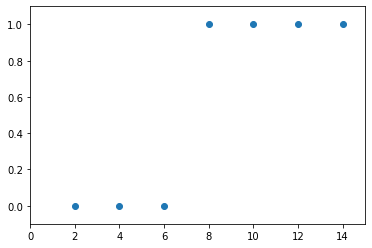

In [4]:
# 그래프로 나타내기
import matplotlib.pyplot as plt

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

In [5]:
# 기울기와 y 절편 초기화
a = 0
b = 0
# 학습률
lr = 0.05

In [6]:
def sigmoid(x):
    return 1 / (1+np.e ** (-x)) # 시그 모이드 식의 형태 그대로 파이썬으로 구현

epoch=0, 기울기=-0.05, 절편=-0.025
epoch=0, 기울기=-0.13879722189107602, 절편=-0.047199305472769
epoch=0, 기울기=-0.2267516349901771, 절편=-0.06185837432261918
epoch=0, 기울기=0.12010284223274431, 절편=-0.018501564669754007
epoch=0, 기울기=0.23740192458962306, 절편=-0.006771656434066131
epoch=0, 기울기=0.27045811205658526, 절편=-0.004016974145152613
epoch=0, 기울기=0.2860409628939473, 절편=-0.0029039133710553225


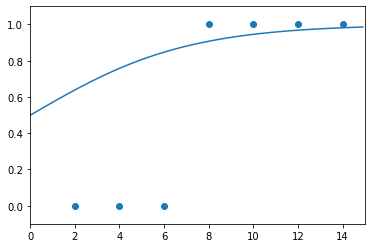

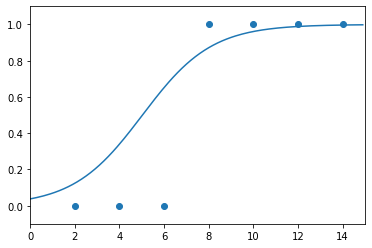

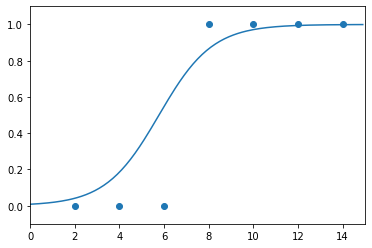

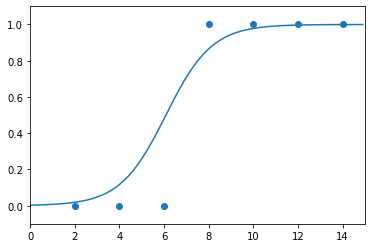

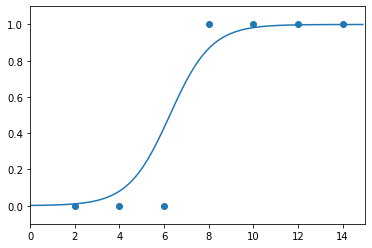

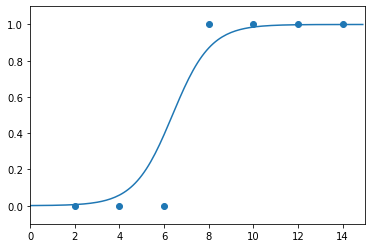

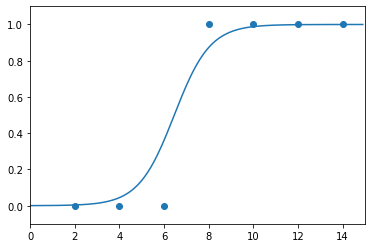

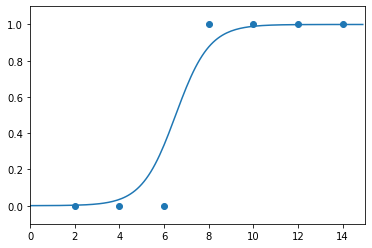

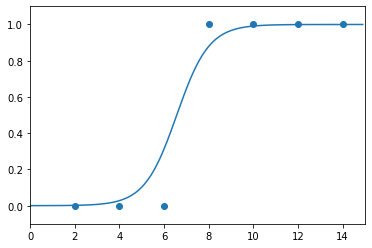

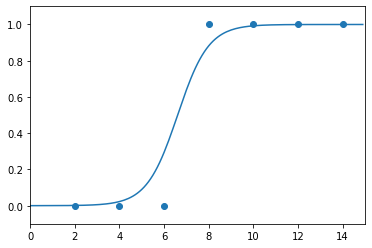

epoch=1000, 기울기=1.497824502953391, 절편=-9.940123304992555
epoch=1000, 기울기=1.4940419536789271, 절편=-9.94106894231117
epoch=1000, 기울기=1.4119848217717417, 절편=-9.954745130962369
epoch=1000, 기울기=1.4949143121842228, 절편=-9.944378944660809
epoch=1000, 기울기=1.498244938547387, 절편=-9.944045882024492
epoch=1000, 기울기=1.4984392510394648, 절편=-9.94402968931682
epoch=1000, 기울기=1.4984505498747405, 절편=-9.944028882257157


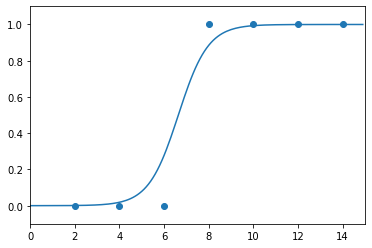

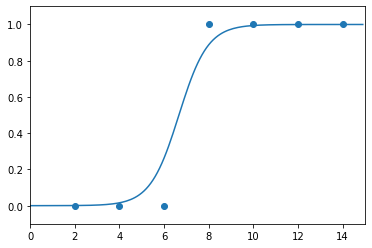

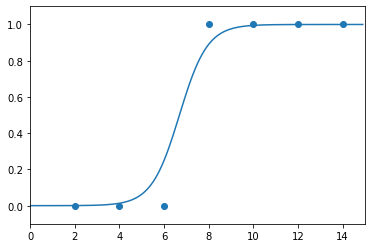

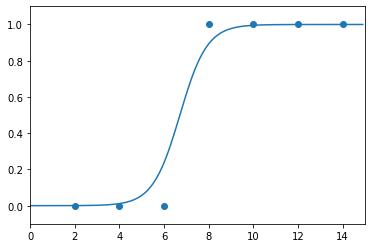

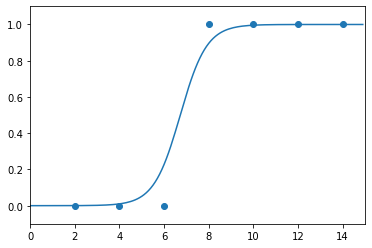

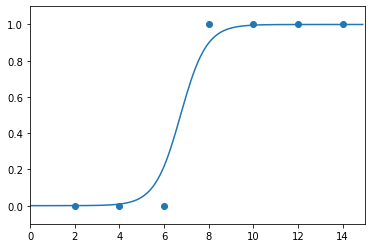

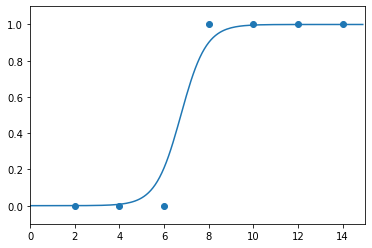

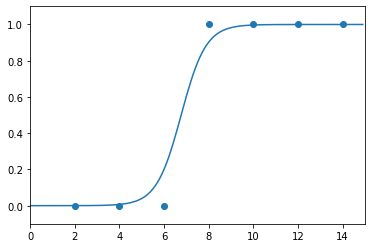

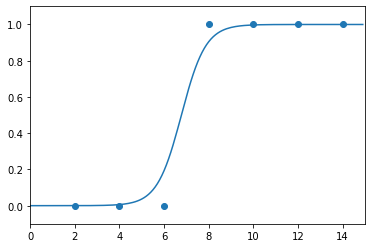

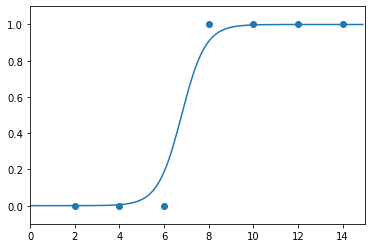

epoch=2000, 기울기=1.9064689962225458, 절편=-12.948894836795326
epoch=2000, 기울기=1.9054981310086199, 절편=-12.949137553098806
epoch=2000, 기울기=1.8514893310246738, 절편=-12.958139019762797
epoch=2000, 기울기=1.9056614126778697, 절편=-12.951367509556148
epoch=2000, 기울기=1.9067744947792462, 절편=-12.95125620134601
epoch=2000, 기울기=1.9068037073321078, 절편=-12.951253766966605
epoch=2000, 기울기=1.9068044592233457, 절편=-12.951253713260089


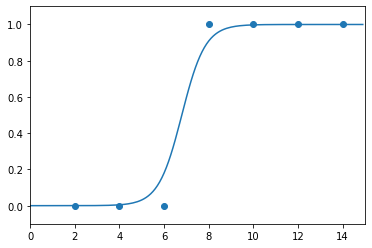

In [7]:
# 경사 하강법 실행
for i in range(2001):
    for x_data2, y_data2 in data:
        # a에 관한 편미분
        a_diff = x_data2 * (sigmoid(a * x_data2 + b) - y_data2)
        # b에 관한 편미분
        b_diff = sigmoid(a * x_data2 + b) - y_data2
        # a를업데이트 하기위해 a-diff에 학습률 lr을 곱한값을 a에서 뺌
        a = a - lr * a_diff
        # b를업데이트 하기위해 b-diff에 학습률 lr을 곱한값을 a에서 뺌
        b = b - lr * b_diff
        
        if i % 1000 == 0:
            print(f"epoch={i}, 기울기={a}, 절편={b}")
            
    if i % 100 == 0:        
        # 앞서구한 기울기와 절편을 이용해 그래프 그리기
        plt.scatter(x_data, y_data)
        plt.xlim(0, 15)
        plt.ylim(-.1, 1.1)
        x_range=(np.arange(0, 15, 0.1))
        plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a * x + b) for x in x_range]))
        plt.show()

# 다중 퍼셉트론으로 XOR 문제 해결하기
## 

In [1]:
import numpy as np

In [2]:
# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])

b1 = 3
b2 = -1
b3 = -1

In [21]:
#  퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) +b
    if y <= 0:
        return 0
    else:
        return 1

# NAND 게이트
def NAND(x1, x2):
    print(np.array([0, 0]))
    print(w11, b1)
    return MLP(np.array([x1, x2]), w11, b1 )
    

# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2 )

# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

In [22]:
# x1, x2 값을 번갈아 대입하여 최종값 출력

for x in [(0,0), (1,0), (0,1), (1,1)]:
    y = XOR(x[0], x[1])
    print(f"입력값: {str(x)}, 출력값 : {str(y)}")

[0 0]
[-2 -2] 3
입력값: (0, 0), 출력값 : 0
[1 0]
[-2 -2] 3
입력값: (1, 0), 출력값 : 1
[0 1]
[-2 -2] 3
입력값: (0, 1), 출력값 : 1
[1 1]
[-2 -2] 3
입력값: (1, 1), 출력값 : 0


In [31]:
def MLP2(x, w, b):
    print(np.sum(w * x) + b)
    y = np.sum(w * x) +b
    if y <= 0:
        return 0
    else:
        return 1
#np.array([0, 0])
#np.array([-2, -2])
#3

MLP2(np.array([0, 0]), np.array([-2, -2]), 3)

3


1